In [2]:
import Pkg; Pkg.status()

Status `~/.julia/environments/v1.10/Project.toml`
  [861a8166] Combinatorics v1.0.2
  [7073ff75] IJulia v1.24.2
  [2b0e0bc5] LanguageServer v4.5.1
  [91a5bcdd] Plots v1.40.4
  [b0d11df0] Quantikz v1.3.1
  [0525e862] QuantumClifford v0.9.4 `../../../Documents/Repos/QuantumClifford.jl`
  [295af30f] Revise v3.5.14
  [37e2e46d] LinearAlgebra


In [3]:
using QuantumClifford, QuantumClifford.ECC

In [4]:
using Quantikz

Precompiling QuantumCliffordQuantikzExt
  ✓ QuantumClifford → QuantumCliffordQuantikzExt
  1 dependency successfully precompiled in 2 seconds. 110 already precompiled.


In [5]:
# methods(RandomCircuitCode)

# All-to-all connection

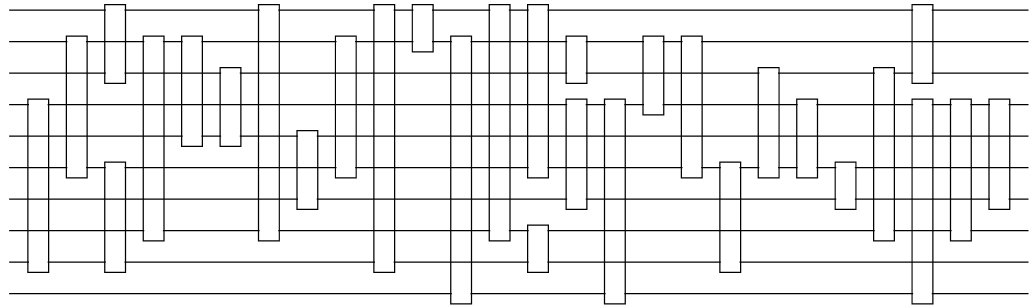

In [6]:
c1 = RandomCircuitCode(10, Val(:alltoall), 30, 2)
c1.circ

In [7]:
c1 |> parity_checks

+ __YYXXXY_Z
+ _XXX_XX___
- _ZXZYXXXX_
- XYY____YY_
+ ___XZ_X___
+ Z_Y_Y_YX_X
+ ___Y__Y__X
- ZZZX____XZ

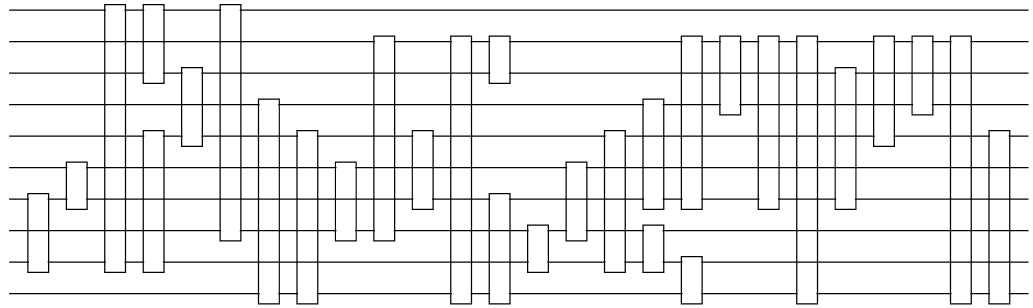

In [7]:
c2 = RandomCircuitCode(10, Val(:alltoall), 30, 1:2:7)
c2.circ

In [8]:
c2 |> parity_checks

- _YX_X__ZYY
- _ZZYX_X_YY
+ _Z__Z_XX_X
- Y_________
+ _X_XYZ_YZY
+ _Z_Z__X_Z_

# Brickwork connection

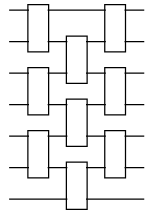

In [9]:
c3 = RandomCircuitCode((7,), Val(:brickwork), 3, [1,3,7])
c3.circ

In [10]:
c3 |> parity_checks

- _YXZ___
- ZYXZ___
- ____X__
- _____X_

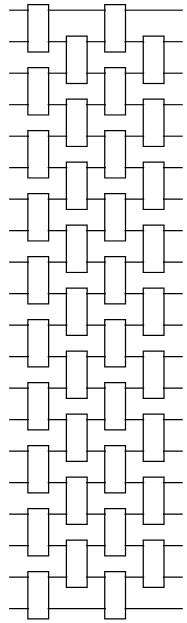

In [11]:
c4 = RandomCircuitCode((20,), Val(:brickwork), 4, 1:2:20)
c4.circ

In [12]:
c4 |> parity_checks

+ XZZYX_______________
+ _XZXX_Z_____________
+ _XZ_Z_Y_____________
+ ___ZZY_Z____________
+ _____Z_YXZX_________
+ ________XZ_XZ_______
+ ___________YXZZ_____
- ___________ZXZYYZ___
- _________________XZZ
- ________________ZX_Z

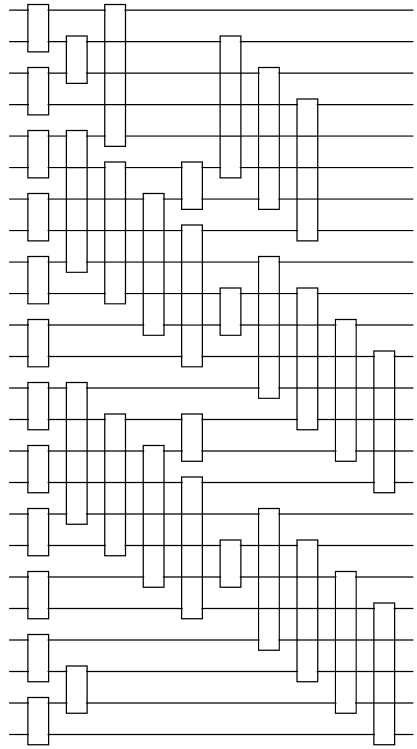

In [13]:
c5 = RandomCircuitCode((4,6), Val(:brickwork), 4, 1:10)
c5.circ

In [14]:
c5 |> parity_checks

+ ___Z_______X___Z________
+ _Y____X_________________
- ____________X___Z___X___
- __________Y___Z_________
- ___________Z___Y________
- _________X_______XZ__ZY_
+ _________________X___Z__
- ____________X____X___Z__
+ _________Z_Z_Z_Y___Y__XZ
+ _________Y___Z_____Z__XZ
+ ________________XZX_YYX_
- ________________YZY_YYX_
+ _________________Z___Y__
+ _________________Z_X_Y_Y

# Debug


In [41]:
# RandomCircuitCode(10, Val(:alltoall), 30, 1) |> naive_encoding_circuit

Now, we find a bug cause `ShorSyndromeECCSetup` to fail randomly with a high probability. It seems that it happens for a large number number of qubits, 20 for example.

By reading the error information, the problem is when using `compactify_circuit` to concvert the circuit, a `ClassicalXOR{17}` is not handled properly. The operation is introduced by `shor_syndrome_circuit`.

In [132]:
using Random

In [133]:
Random.seed!(43)

TaskLocalRNG()

In [134]:
codes_test = [RandomCircuitCode(10, Val(:alltoall), 100, 1), RandomCircuitCode(20, Val(:alltoall), 100, 1)]

2-element Vector{RandomCircuitCode}:
 RandomCircuitCode((10,), Val{:alltoall}(), QuantumClifford.AbstractOperation[SparseGate{QuantumClifford.Tableau{Vector{UInt8}, Matrix{UInt64}}}(CliffordOperator on 2 qubits, [2, 1]), SparseGate{QuantumClifford.Tableau{Vector{UInt8}, Matrix{UInt64}}}(CliffordOperator on 2 qubits, [2, 3]), SparseGate{QuantumClifford.Tableau{Vector{UInt8}, Matrix{UInt64}}}(CliffordOperator on 2 qubits, [10, 2]), SparseGate{QuantumClifford.Tableau{Vector{UInt8}, Matrix{UInt64}}}(CliffordOperator on 2 qubits, [10, 6]), SparseGate{QuantumClifford.Tableau{Vector{UInt8}, Matrix{UInt64}}}(CliffordOperator on 2 qubits, [5, 9]), SparseGate{QuantumClifford.Tableau{Vector{UInt8}, Matrix{UInt64}}}(CliffordOperator on 2 qubits, [7, 5]), SparseGate{QuantumClifford.Tableau{Vector{UInt8}, Matrix{UInt64}}}(CliffordOperator on 2 qubits, [3, 9]), SparseGate{QuantumClifford.Tableau{Vector{UInt8}, Matrix{UInt64}}}(CliffordOperator on 2 qubits, [3, 8]), SparseGate{QuantumClifford.Tableau{

In [135]:
codes_test[2] |> parity_checks

+ XY__Z_ZZXY_XXYXYX_ZZ
- ZXYZY_X____YZZ_YXZZY
- Y_X__X_Y_Y_ZYYX__Z_Z
+ YZ__XY_X_____Y_XYZ__
+ XZYYYY_ZX_XYZ___YYZX
+ XXXXY__ZZZY_YYYZXZXZ
- X_ZXYXXZ_ZZXZYXZYYYX
+ XXYYYZZYZY_ZY__XZZYY
+ Y_YYXYZZ____XYZ__YY_
- X_ZYZXXY_XZ_XY__XXZX
+ XYY_YYZZ_Z__XZ___XY_
- X_ZXZ_YZZ_ZZZYY_Z_XX
- YYZ__X_Z_Z_YX_XY__ZY
- _YXZXZYZYYZ_ZYX__XZ_
+ _XXX_YYXXZZ_YY_ZZXYZ
- YXXZXZ_X_Z_XZZ_ZZXZX
- XZXXZ___XYXXYXXZZXY_
- Z_XYYYZY_XYZZXXXZYXZ
- XZX_X_Y_Z_ZXYX_Y_X_Z

In [136]:
noise = 0.001

setups = [
    # CommutationCheckECCSetup(noise),
    # NaiveSyndromeECCSetup(noise, 0),
    ShorSyndromeECCSetup(noise, 0),
]

for c in codes_test
    for s in setups
        for d in [TableDecoder]
            e = evaluate_decoder(d(c), s, 100000)
            #@show c
            #@show s
            #@show e
            @show max(e...), noise, noise/4
            if max(e...) >= noise/4
                println("noise is large!")
            end
        end
    end
end

(max(e...), noise, noise / 4) = (4.0e-5, 0.001, 0.00025)


LoadError: MethodError: [0mCannot `convert` an object of type 
[0m  [92mClassicalXOR{17}[39m[0m to an object of type 
[0m  [91mUnion{SumTypes.Variant{Symbol("QuantumClifford.sHadamard"), (:_1,), Tuple{Int64}}, SumTypes.Variant{Symbol("QuantumClifford.sId1"), (:_1,), Tuple{Int64}}, SumTypes.Variant{Symbol("QuantumClifford.sInvPhase"), (:_1,), Tuple{Int64}}, SumTypes.Variant{Symbol("QuantumClifford.sPhase"), (:_1,), Tuple{Int64}}, SumTypes.Variant{Symbol("QuantumClifford.sX"), (:_1,), Tuple{Int64}}, SumTypes.Variant{Symbol("QuantumClifford.sY"), (:_1,), Tuple{Int64}}, SumTypes.Variant{Symbol("QuantumClifford.sZ"), (:_1,), Tuple{Int64}}, SumTypes.Variant{Symbol("QuantumClifford.sCNOT"), (:_1, :_2), Tuple{Int64, Int64}}, SumTypes.Variant{Symbol("QuantumClifford.sCPHASE"), (:_1, :_2), Tuple{Int64, Int64}}, SumTypes.Variant{Symbol("QuantumClifford.sSWAP"), (:_1, :_2), Tuple{Int64, Int64}}, SumTypes.Variant{Symbol("QuantumClifford.sXCX"), (:_1, :_2), Tuple{Int64, Int64}}, SumTypes.Variant{Symbol("QuantumClifford.sXCY"), (:_1, :_2), Tuple{Int64, Int64}}, SumTypes.Variant{Symbol("QuantumClifford.sXCZ"), (:_1, :_2), Tuple{Int64, Int64}}, SumTypes.Variant{Symbol("QuantumClifford.sYCX"), (:_1, :_2), Tuple{Int64, Int64}}, SumTypes.Variant{Symbol("QuantumClifford.sYCY"), (:_1, :_2), Tuple{Int64, Int64}}, SumTypes.Variant{Symbol("QuantumClifford.sYCZ"), (:_1, :_2), Tuple{Int64, Int64}}, SumTypes.Variant{Symbol("QuantumClifford.sZCX"), (:_1, :_2), Tuple{Int64, Int64}}, SumTypes.Variant{Symbol("QuantumClifford.sZCY"), (:_1, :_2), Tuple{Int64, Int64}}, SumTypes.Variant{Symbol("QuantumClifford.sZCZ"), (:_1, :_2), Tuple{Int64, Int64}}, SumTypes.Variant{Symbol("QuantumClifford.sZCrY"), (:_1, :_2), Tuple{Int64, Int64}}, SumTypes.Variant{Symbol("QuantumClifford.sMX"), (:_1, :_2), Tuple{Int64, Int64}}, SumTypes.Variant{Symbol("QuantumClifford.sMY"), (:_1, :_2), Tuple{Int64, Int64}}, SumTypes.Variant{Symbol("QuantumClifford.sMZ"), (:_1, :_2), Tuple{Int64, Int64}}, SumTypes.Variant{Symbol("QuantumClifford.sMRX"), (:_1, :_2), Tuple{Int64, Int64}}, SumTypes.Variant{Symbol("QuantumClifford.sMRY"), (:_1, :_2), Tuple{Int64, Int64}}, SumTypes.Variant{Symbol("QuantumClifford.sMRZ"), (:_1, :_2), Tuple{Int64, Int64}}, SumTypes.Variant{Symbol("QuantumClifford.ClassicalXOR{2}"), (:_1, :_2), Tuple{Tuple{Int64, Int64}, Int64}}, SumTypes.Variant{Symbol("QuantumClifford.ClassicalXOR{3}"), (:_1, :_2), Tuple{Tuple{Int64, Int64, Int64}, Int64}}, SumTypes.Variant{Symbol("QuantumClifford.ClassicalXOR{4}"), (:_1, :_2), Tuple{NTuple{4, Int64}, Int64}}, SumTypes.Variant{Symbol("QuantumClifford.ClassicalXOR{5}"), (:_1, :_2), Tuple{NTuple{5, Int64}, Int64}}, SumTypes.Variant{Symbol("QuantumClifford.ClassicalXOR{6}"), (:_1, :_2), Tuple{NTuple{6, Int64}, Int64}}, SumTypes.Variant{Symbol("QuantumClifford.ClassicalXOR{7}"), (:_1, :_2), Tuple{NTuple{7, Int64}, Int64}}, SumTypes.Variant{Symbol("QuantumClifford.ClassicalXOR{8}"), (:_1, :_2), Tuple{NTuple{8, Int64}, Int64}}, SumTypes.Variant{Symbol("QuantumClifford.ClassicalXOR{9}"), (:_1, :_2), Tuple{NTuple{9, Int64}, Int64}}, SumTypes.Variant{Symbol("QuantumClifford.ClassicalXOR{10}"), (:_1, :_2), Tuple{NTuple{10, Int64}, Int64}}, SumTypes.Variant{Symbol("QuantumClifford.ClassicalXOR{11}"), (:_1, :_2), Tuple{NTuple{11, Int64}, Int64}}, SumTypes.Variant{Symbol("QuantumClifford.ClassicalXOR{12}"), (:_1, :_2), Tuple{NTuple{12, Int64}, Int64}}, SumTypes.Variant{Symbol("QuantumClifford.ClassicalXOR{13}"), (:_1, :_2), Tuple{NTuple{13, Int64}, Int64}}, SumTypes.Variant{Symbol("QuantumClifford.ClassicalXOR{14}"), (:_1, :_2), Tuple{NTuple{14, Int64}, Int64}}, SumTypes.Variant{Symbol("QuantumClifford.ClassicalXOR{15}"), (:_1, :_2), Tuple{NTuple{15, Int64}, Int64}}, SumTypes.Variant{Symbol("QuantumClifford.ClassicalXOR{16}"), (:_1, :_2), Tuple{NTuple{16, Int64}, Int64}}, SumTypes.Variant{Symbol("QuantumClifford.NoiseOp{(QuantumClifford.UnbiasedUncorrelatedNoise{Float64}, 1)}"), (:_1, :_2), Tuple{UnbiasedUncorrelatedNoise{Float64}, Tuple{Int64}}}, SumTypes.Variant{Symbol("QuantumClifford.NoiseOp{(QuantumClifford.UnbiasedUncorrelatedNoise{Float64}, 2)}"), (:_1, :_2), Tuple{UnbiasedUncorrelatedNoise{Float64}, Tuple{Int64, Int64}}}, SumTypes.Variant{Symbol("QuantumClifford.NoiseOp{(QuantumClifford.UnbiasedUncorrelatedNoise{Float64}, 3)}"), (:_1, :_2), Tuple{UnbiasedUncorrelatedNoise{Float64}, Tuple{Int64, Int64, Int64}}}, SumTypes.Variant{Symbol("QuantumClifford.NoiseOp{(QuantumClifford.UnbiasedUncorrelatedNoise{Float64}, 4)}"), (:_1, :_2), Tuple{UnbiasedUncorrelatedNoise{Float64}, NTuple{4, Int64}}}, SumTypes.Variant{Symbol("QuantumClifford.NoiseOp{(QuantumClifford.UnbiasedUncorrelatedNoise{Float64}, 5)}"), (:_1, :_2), Tuple{UnbiasedUncorrelatedNoise{Float64}, NTuple{5, Int64}}}, SumTypes.Variant{Symbol("QuantumClifford.NoiseOp{(QuantumClifford.UnbiasedUncorrelatedNoise{Float64}, 6)}"), (:_1, :_2), Tuple{UnbiasedUncorrelatedNoise{Float64}, NTuple{6, Int64}}}, SumTypes.Variant{Symbol("QuantumClifford.NoiseOp{(QuantumClifford.UnbiasedUncorrelatedNoise{Float64}, 7)}"), (:_1, :_2), Tuple{UnbiasedUncorrelatedNoise{Float64}, NTuple{7, Int64}}}, SumTypes.Variant{Symbol("QuantumClifford.NoiseOp{(QuantumClifford.UnbiasedUncorrelatedNoise{Float64}, 8)}"), (:_1, :_2), Tuple{UnbiasedUncorrelatedNoise{Float64}, NTuple{8, Int64}}}, SumTypes.Variant{Symbol("QuantumClifford.SingleQubitOperator"), (:_1, :_2, :_3, :_4, :_5, :_6, :_7), Tuple{Int64, Vararg{Bool, 6}}}, SumTypes.Variant{Symbol("QuantumClifford.NoiseOpAll"), (:_1,), Tuple{QuantumClifford.AbstractNoise}}, SumTypes.Variant{Symbol("QuantumClifford.VerifyOp"), (:_1, :_2), Tuple{Stabilizer, AbstractVector{Int64}}}, SumTypes.Variant{Symbol("QuantumClifford.BellMeasurement"), (:_1, :_2), Tuple{Vector{Union{sMX, sMY, sMZ}}, Bool}}, SumTypes.Variant{Symbol("QuantumClifford.NoisyGate"), (:_1, :_2), Tuple{QuantumClifford.AbstractOperation, QuantumClifford.AbstractNoise}}}[39m

[0mClosest candidates are:
[0m  convert(::Type{T}, [91m::T[39m) where T
[0m[90m   @[39m [90mBase[39m [90m[4mBase.jl:84[24m[39m


In [116]:
# c_test = RandomCircuitCode(20, Val(:alltoall), 100, [1,10]);

In [115]:
# parity_checks(c_test)

In [63]:
# encoding_circ = naive_encoding_circuit(c_test);

In [64]:
# compactify_circuit(encoding_circ)

In [62]:
# pftrajectories(encoding_circ;trajectories=5000)